REMEMBER:

- TO PRINT AN ITERABLE (ARRAY, LIST, DIC...) WITH SEPARATORS USE



```
print(*myArray, sep = "\n")
```


- TO CONVERT A TENSOR TO AN ARRAY (FOR VISIBILITY USE:

```
myTensor.numpy()
```



##TensorFlow



In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


###Tensors

A Tensor is a generalisztion of vectors and matrices to potentially higher dimentions

each tensor has a datatype and a shape


In [ ]:
string = tf.Variable("this is a string", tf.string)
number = tf.Variable(324, tf.int16)
float_number = tf.Variable(3.567, tf.float64)

print(tf.rank(string))
print(string.shape)

tf.Tensor(0, shape=(), dtype=int32)
()


#####Rank/ Degree of Tensor

*   The number of dimensions of the tensor
*   Note that arrays are rank 1 and 2D matrices are rank 2 and so on

#####Shape of Tensor

*   The shape is the length of each dimension
*   Rank 1 tensors have 1D shape, rank 2 have 2D shape and so on


In [ ]:
rank1_tensor = tf.Variable(["test", "ok", "yes"], tf.string)
rank2_tensor = tf.Variable([["test", "ok"],["test", "ok"],["test", "ok"]], tf.string)

print(tf.rank(rank1_tensor))
print(rank1_tensor.shape)

print(tf.rank(rank2_tensor))
print(rank2_tensor.shape)

tf.Tensor(1, shape=(), dtype=int32)
(3,)
tf.Tensor(2, shape=(), dtype=int32)
(3, 2)


#####Changing Shapes:

In [ ]:
tensor1 = tf.ones([1,2,3])
tensor2 = tf.reshape(tensor1, [2,3,1])
# -1 TELLS THE TENSOR TO FIGURE OUT THE SIZE OF THAT DIMENSION
tensor3 = tf.reshape(tensor2, [3, -1])
# IN THAT CASE IT WILL BE [3,2]


print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


practicing reshaping...

In [ ]:
t = tf.zeros([5,5,5,5])

# TO FLATTEN THE TENSOR INTO 1D:
t = tf.reshape(t, [625])
# t = tf.reshape(t, 625)
# t = tf.reshape(t, -1)
# ALL OF THE ABOVE DO THE SAME

print(t)

tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

####Tensor Types


*   Variable
*   Constant
*   Placeholder
*   SparseTensor

Variable is the only one that is NOT immuttable (its value can change during excution)


####Evaluating Tensors

We need to run a session to evaluate the value of the tensor



```
with tf.Session() as sess:    #CREATES A SESSION USING DEFAULT GRAPH
  TENSOR.eval()
```



Core Learning Algorithms


*   Linear Regression
*   Classification
*   Clustering
*   Hidden Malkov Models




###Linear Regression

If data points are related linearly, we can generate a line of best fit for these points and use it to predict future values.

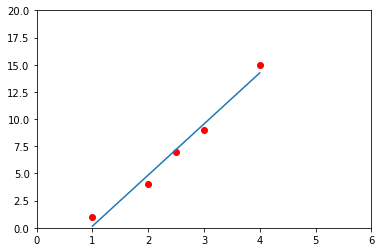

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]


plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [ ]:
# YOU HAVE TO INSTALL SKLEARN

!pip install -q sklearn

In [ ]:
# YOU HAVE TO USE TENSORFLOW V 2.X

%tensorflow_version 2.x

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd          # DATA ANALYTICS TOOL (LOAD, SAVE, MANUPLATE TABLES)
import matplotlib.pyplot as plt
from IPython.display import clear_output   # FOR THIS NOTEBOOK TO CLEAR OUTPUTS
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [ ]:
# YOU NEED TO LOAD 2 DATA FRAMES (SETS), ONE FOR TRAINING AND ONE FOR TESTING

dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data

# TO GET A LOOK AT THE DATASET (HEADER AND FIRST 4 RESULTS):
print(dftrain.head())

# TO ACCESS ONE ROW ===> dftrain.loc[ROW_NUMBER]:
print(dftrain.loc[0])

# TO ACCESS ONE COLUMN ===> dftrain["COLUMN_NAME"]
print(dftrain["age"])

# TO GET A STATISTICAL ANALYSIS OF DATA:
print(dftrain.describe())

# TO GET THE DATASET SHAPE (ROWS, COLUMNS):
print(dftrain.shape)

# YOU NEED TO SEPARATE THE OUTPUT FROM THE INPUTS (LABELS FROM FEATURES)
# WE ARE LOOKING FOR THE SURVIVAL PROBABILITY, SO THE SURVIVED COLUMN IS SEPARATED FROM THE INPUTS (AGE, SEX, ALONE, DECK,...)
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
survived                        0
sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object
0      22.0


In [ ]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


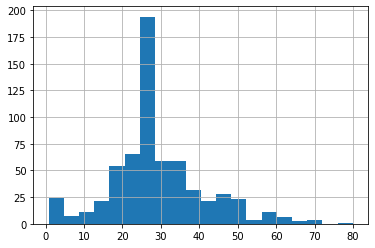

In [ ]:
# WE CAN SOME GRAPHS TO VISUALISE THE DATA

# TO VISUALISE AGE GROUPS
dftrain.age.hist(bins=20)

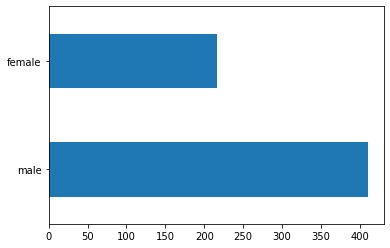

In [ ]:
# TO VISUALISE THE COUNT OF MALES AND FEMALES

dftrain.sex.value_counts().plot(kind='barh')

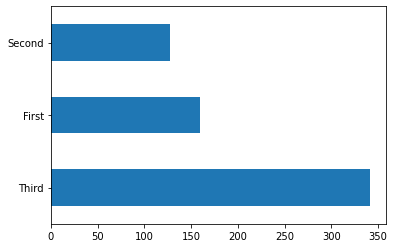

In [ ]:
# TO VISUALISE THE COUNT OF PEOPLE IN EACH CLASS (FIRST, SECOND AND THIRD)

dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

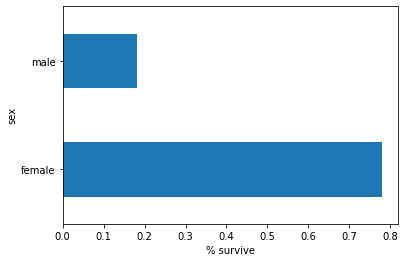

In [ ]:
# TO VISUALISE THE SURVIVAL PROBABILITY FOR EACH SEX:

# HERE WE CONCATENATED THE survived DATASET WITH THE TRAINING DATA SET
# THEN GROUPED BY SEX
# AND EVALUATED THE MEAN OF COL survived
pd.concat([dftrain, y_train], axis=1) \
.groupby('sex') \
.survived.mean() \
.plot(kind='barh').set_xlabel('% survive')

In [ ]:
# IN ORDER FOR THE MODEL TO TRAIN, WE NEED TO CONVERT ALL CATEGORICAL COLUMNS TO NUMERICAL ONES
# I.E, THE SEX COLUMN, WE NEED TO CONVERT MALE TO 0 AND FEMALE TO 1 FOR EXAMPLE..

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck','embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

# CREATE AN EMPTY FEATURE COLUMN TO ADD FEATURES TO
feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  # LOOP THROUGH CATEGORICAL COLUMNS, AND GET A LIST OF ALL UNIQUE VALUES IN EACH COLUMNS (IN SEX: MALE AND FEMALE):
  vocabulary = dftrain[feature_name].unique()
  print(f'{feature_name} ==> {vocabulary}')

  # APPEND TO feature_columns A TENSOR OF CATEGORICAL EACH CATEGORICAL FEATURE AND ITS UNIQUE VOCAB
  ## VocabularyListCategoricalColumn(key, vocabulary_list, dtype, default_value, num_oov_buckets)
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  ## NumericColumn(key, shape, default_value, dtype, normalizer_fn)
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print("\n")

print(*feature_columns, sep = '\n')

sex ==> ['male' 'female']
n_siblings_spouses ==> [1 0 3 4 2 5 8]
parch ==> [0 1 2 5 3 4]
class ==> ['Third' 'First' 'Second']
deck ==> ['unknown' 'C' 'G' 'A' 'B' 'D' 'F' 'E']
embark_town ==> ['Southampton' 'Cherbourg' 'Queenstown' 'unknown']
alone ==> ['n' 'y']


VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0)
VocabularyLi

WHEN WE LOAD THE DATA TO THE ML MODEL, WE NEED TO DO SO IN BATCHES (OF 32)

An epoch is simply one stream of our entire dataset. The number of epochs we define is the amount of times our model will see the entire dataset (IN DIFFERENT ORDER).

We use multiple epochs in hope that after seeing the same data multiple times the model will better determine how to estimate it.

OVERFITTING: WHEN THE MODEL SEES THE SAME DATA TOO MANY TIMES

TO OVERCOME THIS, START WITH A LOW NUMBER OF EPOCHS AND THEN WORK YOUR WAY UP

In [ ]:
# The TensorFlow model we are going to use requires that the data we pass it comes in as a tf.data.Dataset object.
# This means we must create a input function that can convert our current pandas dataframe into that object.
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  # WE HAVE A FUNC IN A FUNC, BECAUSE WE WANT THE RETURN TYPE TO BE A FUNC
  def input_function():  # inner function, this will be returned
    # create tf.data.Dataset object with data and its label
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))

    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data

    # split dataset into batches (of 32) and repeat process for number of epochs
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

# We create a linear estimtor MODEL by passing the feature columns we created earlier
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpxm_0pmrb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


TRAINING AND EVALUATING THE MODEL

In [ ]:
linear_est.train(train_input_fn)  # train
model = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears console output
print(model['accuracy'])  # the result variable is simply a dict of stats about our model

0.71590906


In [ ]:
print(model)

{'accuracy': 0.71590906, 'accuracy_baseline': 0.625, 'auc': 0.8137741, 'auc_precision_recall': 0.7758043, 'average_loss': 0.6192116, 'label/mean': 0.375, 'loss': 0.619078, 'precision': 0.5882353, 'prediction/mean': 0.57147443, 'recall': 0.8080808, 'global_step': 200}


NOW LETS USE THE MODEL TO PREDICT:

In [ ]:
# WE NEED TO PASS AN INPUT FUNC TO linear_est.predict() IN ORDER TO MAKE THE PREDICTION
# AND WE NEED IT TO BE A LIST TO LOOP THROUGH IT
predictions = list(linear_est.predict(make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)))

# predictions ^^ IS A LIST OF DICTIONARIES

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxm_0pmrb/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-1.2635994], dtype=float32), 'logistic': array([0.22035491], dtype=float32), 'probabilities': array([0.77964514, 0.22035491], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([1.5433158], dtype=float32), 'logistic': array([0.82394624], dtype=float32), 'probabilities': array([0.17605378, 0.82394624], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([3.0980394], dtype=float32), 'logistic': array([0.9568118], dtype=float32), 'probabilities': array([0.0431882, 0.9568118], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([2.4035447], dtype=float

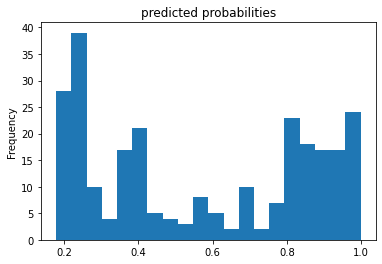

In [ ]:
print(predictions)

print("\n")

person_index = 2

# EACH DICT IS REPRESENTS ONE PASSENGER IN THE TITANIC
print(predictions[person_index])

print("\n")

print(predictions[person_index]["probabilities"])

print("\n")
# TO PRINT THE PERSON'S ENTIRE STATS:
print(*dfeval.loc[person_index])

print("\n")

# TO COMPARE IT TO THE ACTUAL LABEL:
print(f'person number {person_index} actual stat in survival is {y_eval[person_index]} and predicted is {predictions[person_index]["probabilities"][1]}')

print("\n")

# LETS PLOT THE RESULT:
probs = pd.Series([prediction['probabilities'][1] for prediction in predictions])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

###CLASSIFICATION
the grouping of data points. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features.

the model gives a percentage of the probabilty of each data point being in each class

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import pandas as pd

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


####Dataset
This specific dataset seperates flowers into 3 different classes of species.
- Setosa
- Versicolor
- Virginica

The information about each flower is the following.
- sepal length
- sepal width
- petal length
- petal width

In [ ]:
# FOR THIS PARTICULAR DATASET, WE DON'T HAVE A HEADER ROW AND THE SPECIES COLUMNS IS NUMERIC VALUES INSTEAD OF CATEGORICAL
# SO, WE NEED TO ASSIGN EACH COLUMN A NAME AND EACH SPECIES A NAME

CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

# HERE WE DOWNLOAD THE CSV FILE FROM THE LINK AND SAVE IT WITH A NAME ****.csv
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

# HERE WE ADD THE TOP ROW THAT CONTAINS COLUMN NAMES
# TRAINING FEATURES:
train = pd.read_csv(train_path, names = CSV_COLUMN_NAMES, header = 0)
# TESTING FEATURES:
test = pd.read_csv(test_path, names = CSV_COLUMN_NAMES, header = 0)

In [ ]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
# REMEMBER WE NEED TO SEPARATE THE LABELS COLUMNS:

# TRAINING LABELS:
train_y = train.pop('Species')
# TESTING LABELS
test_y = test.pop('Species')

train.shape  # we have 120 entires with 4 features

(120, 4)

In [ ]:
# LETS MAKE AN INPUT FUNC:
## REMEMBER THE INNER INPUT FUNC RETURNS BATCHES
def input_fn(features, labels, training = True, batch_size = 256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)

In [ ]:
# Feature columns describe how to use the input.

my_feature_columns = []

# train.keys() ===> RETURNS A LIST OF COLUMN NAMES
# CAN BE DONE USING THE CSV_COLUMN_NAMES VARIABLE AND POPPING SPECIES OFF

for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key = key))

print(*my_feature_columns, sep = '\n')

NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


####Building the Model
And now we are ready to choose a model. For classification tasks there are variety of different estimators/models that we can pick from. Some options are listed below.
- ```DNNClassifier``` (Deep Neural Network)
- ```LinearClassifier```

We can choose either model but the DNN seems to be the best choice. This is because we may not be able to find a linear coorespondence in our data.

So let's build a model!

We will create a deep neural network that has two hidden layers. These layers have 30 and 10 neurons respectively. This is the number of neurons the TensorFlow official tutorial uses so we'll stick with it.

However, it is worth mentioning that the number of hidden neurons is an arbitrary number and many experiments and tests are usually done to determine the best choice for these values.

In [ ]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
# tf.estimator CONTAINS MANY PREBUILT MODELS
classifier = tf.estimator.DNNClassifier(
    feature_columns = my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units = [30, 10],
    # The model must choose between 3 classes (THE 3 SPECIES OF FLOWERS)
    n_classes = 3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpskc6odrs', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


####TRAINING

In [ ]:
# We include a lambda to avoid creating an inner function previously

classifier.train(
    input_fn = lambda: input_fn(train, train_y, training = True),
    steps = 5000)    # STEPS IS SIMILAR TO EPOCHS

# IN THE CONSOLE, WE SEE THE # OF STEP AND THE LOSS
## THE SMALLER THE LOSS THE BETTER

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpskc6odrs/model.ckpt-5000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5000...
INFO:tensorflow:Saving checkpoints for 5000 into /tmp/tmpskc6odrs/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5000...
INFO:tensorflow:loss = 0.9102694, step = 5000
INFO:tensorflow:global_step/sec: 304.701
INFO:tensorflow:loss = 0.9091872, step = 5100 (0.331 sec)
INFO:tensorflow:global_step/sec: 421.731
INFO:tensorflow:loss = 0.8935021, step = 5200 (0.241 sec)
INFO:tensorflow:global_step/sec: 436.026
INFO:tensorflow:loss = 0.8958547, step = 5300 (0.230 sec)
INFO:tensorflow:global_step/sec: 402.188
I

####EVALUATION

In [ ]:
eval_result = classifier.evaluate(
    input_fn = lambda: input_fn(test, test_y, training = False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-07-15T14:51:54
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpskc6odrs/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.28586s
INFO:tensorflow:Finished evaluation at 2022-07-15-14:51:54
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.6666667, average_loss = 0.7720929, global_step = 10000, loss = 0.7720929
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: /tmp/tmpskc6odrs/model.ckpt-10000

Test set accuracy: 0.667



####PREDICTION

Here is some example input and expected classes you can try:

predict_x =

    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],

expected =

    ['Setosa', 'Versicolor', 'Virginica']

In [ ]:
def input_fn(features, batch_size = 256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")

# FOR EACH FEATURE, GET AN INPUT FROM USER
for feature in features:
  valid = True

  while valid:
    # THE CONSOLE MSG WILL BE FEATURE_NAME:
    val = input(feature + ": ")

    # IF THE INPUT VALUE IS NOT A DIGIT, REPEAT UNTIL IS
    if not val.isdigit(): valid = False

  # ADD USER INPUT TO A DICT
  ## THE MODEL EXPECTS A LIST, THAT'S WHY EVEN IF YOU HAVE ONE ENTRY, IT HAS TO BE A LIST
  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn = lambda: input_fn(predict))

for pred_dict in predictions:
    print(pred_dict)

    class_id = pred_dict['class_ids'][0]
    # WE GET PROBABILITIES IN ALL CLASSES (3 IN THIS EXAMPLE)
    ## BUT LETS LOOK AT THE PROBABILITY AT THE PREDICTED class_id
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))


Please type numeric values as prompted.
SepalLength: 5.1
SepalWidth: 3.3
PetalLength: 1.7
PetalWidth: 0.5
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpskc6odrs/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([ 0.02187417, -0.43305802,  0.24503675], dtype=float32), 'probabilities': array([0.34667876, 0.21996455, 0.4333567 ], dtype=float32), 'class_ids': array([2]), 'classes': array([b'2'], dtype=object), 'all_class_ids': array([0, 1, 2], dtype=int32), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
Prediction is "Virginica" (43.3%)


###Clustering
Now that we've covered regression and classification it's time to talk about clustering data!

Clustering is a Machine Learning technique that involves the grouping of data points. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. (https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)

Unfortunalty there are issues with the current version of TensorFlow and the implementation for KMeans. This means we cannot use KMeans without writing the algorithm from scratch. We aren't quite at that level yet, so we'll just explain the basics of clustering for now.

####Basic Algorithm for K-Means.
- Step 1: Pick the number of clusters K (randomly or based on the understanding of data)
- Step 2: Centroids are placed randomly among the data points
- Step 3: Datapoint by datapoint, calculate the euclidean distance between the datapoint and each centroid.
- Step 4: Each datapoint is assigned to the cluster (centroid) closest to it
- Step 5: Average all the points belonging to each centroid to find the middle of those clusters (center of mass). Place the corresponding centroids into that position.
- Step 6: Reassign every point once again to the closest centroid.
- Step 7: Repeat steps 3-4 until no point changes which centroid it belongs to.

*Please refer to the video for an explanation of KMeans clustering.*

###Hidden Markov Models

Finds a hidden (unobservable) state using other dependant observable states and their probabilities.

Transformation probability: the probability of one hidden state transforming into another.

Observation probability: the probability of observable states for each hidden state


####To create a hidden markov model we need.

1.   States
2.   Observation Distribution
3.   Transition Distribution

####Weather Model:

Taken direclty from the TensorFlow documentation (https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel).

*   we cannot directly observe the weather (COLD or HOT)

*   we can observe if tim is happy or sad

*   we know the probabilities of tim being happy or sad in each hidden state (HOT or COLD)

*   we know the transformation probabilities (i.e if yesterday was sunny, today will be 80% sunny and 20% rainy ..)

*   for sunny days ==> the max temp is 25, min temp is 15, mean temp is 20
*   for rainy days ==> the max temp is 15, min temp is -5, mean temp is 5

We will model a simple weather system and try to predict the temperature on each day given the following information.
1. Cold days are encoded by a 0 and hot days are encoded by a 1.
2. The first day in our sequence has an 80% chance of being cold.
3. A cold day has a 30% chance of being followed by a hot day.
4. A hot day has a 20% chance of being followed by a cold day.
5. On each day the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day and mean and standard deviation 15 and 10 on a hot day.

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow_probability as tfp
import tensorflow as tf

In [ ]:
tfd = tfp.distributions  # A SHORTHAND

# WE NEED A PROBABILITY FOR EACH STATE:
## SINCE WE HAVE 2 STATES (COLD AND HOT):
initial_distribution = tfd.Categorical(probs = [0.8, 0.2])  # REFER TO POINT 2. ABOVE

transition_distribution = tfd.Categorical(probs = [[0.7, 0.3], [0.2, 0.8]])  # REFER TO POINTS 3. AND 4. ABOVE

observation_distribution = tfd.Normal(loc = [0.0, 15.0], scale = [5.0, 10.0])  # REFER TO POINT 5. ABOVE
## loc ==> means
## scale ==> std devs

In [ ]:
# LET'S BUILD THE MODEL THAT PREDICT THE AVG TEMP

model = tfd.HiddenMarkovModel(
    initial_distribution = initial_distribution,
    transition_distribution = transition_distribution,
    observation_distribution = observation_distribution,
    num_steps = 7)

# num_steps ==> THE NUMBER OF DAYS WE WANT TO PREDICT TEMPERATURES FOR
## IN THIS EXAMPLE, WE WANT TO PREDICT TEMPS FOR 7 DAYS

In [ ]:
# TO GET THE MEAN TEMP FOR THE 7 DAYS:
mean = model.mean()

# REMEMBER, mean IS A TENSOR, SO, TO VIEW IT, CONVERT IT TO A NUMPY ARRAY USING .numpy()
## TO PRINT THE 7-DAY PREDICTIONS, INSTEAD OF:
print(mean)

## DO:
with tf.compat.v1.Session() as sess:
  print(mean.numpy())

## THIS ALSO WORKS FINE!
print(mean.numpy())

tf.Tensor([2.9999998 5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ], shape=(7,), dtype=float32)
[2.9999998 5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ]
[2.9999998 5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ]
